In [1]:
%matplotlib inline
%pylab inline

import os
os.chdir('/home/pbreen/Desktop/word_analysis_socialmed')

from gensim.models import Word2Vec
import pandas as pd
import numpy as np

from sm_w2v.utils import (
    twts,
    len_iterable,
    cleaned_sentences_twt,
    coord_twts,
    
    )
from sm_w2v.plot_utils import (
    make_heatmap_w2vrelated,
    make_histogram,
    scikit_pca,
    plot_map,
    make_tsne_plot
    )

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Now load model
model = Word2Vec.load("sm_w2v/models_freq_tables/red.model")

# print word to vec results over all tweets for words related to 'hiv'
rel_wds = model.most_similar(positive=['prophylaxis'], topn=10)
print('\n most similar word(s) to hiv (according to word2vec):')
print(rel_wds)


 most similar word(s) to hiv (according to word2vec):
[('preexposure', 0.6417878866195679), ('pep', 0.5105806589126587), ('regimens', 0.4763466417789459), ('antiretroviral', 0.4513436555862427), ('randomized', 0.44970396161079407), ('prophylactic', 0.4457041621208191), ('tdf', 0.4409594237804413), ('therapy', 0.43499526381492615), ('greatly', 0.4347962439060211), ('reprieve', 0.4261045753955841)]


# Do time Series

,preexposure,pep,regimens,antiretroviral,randomized,prophylactic,tdf,therapy,greatly,reprieve
date (YYYYWW),,,,,,,,,,
200901,0.000000e+00,0.001512,0.000000,8.592320e-06,0.000017,0.000009,0.000009,0.000464,0.000705,0.000026
200902,0.000000e+00,0.001092,0.000016,4.075727e-06,0.000045,0.000004,0.000012,0.000452,0.000599,0.000012
200903,0.000000e+00,0.000930,0.000000,8.047869e-06,0.000016,0.000012,0.000016,0.000423,0.000515,0.000020
200904,0.000000e+00,0.000707,0.000004,4.112586e-06,0.000033,0.000025,0.000008,0.000506,0.000502,0.000016
200905,0.000000e+00,0.001049,0.000013,0.000000e+00,0.000047,0.000009,0.000026,0.000314,0.000546,0.000004
200906,0.000000e+00,0.001175,0.000013,0.000000e+00,0.000025,0.000013,0.000008,0.000704,0.000632,0.000013
200907,0.000000e+00,0.001680,0.000004,1.754848e-05,0.000022,0.000004,0.000013,0.000434,0.000676,0.000009
200908,0.000000e+00,0.000994,0.000009,1.279340e-05,0.000013,0.000021,0.000013,0.000384,0.000691,0.000013
200909,0.000000e+00,0.000982,0.000008,2.021264e-05,0.000040,0.000004,0.000016,0.000319,0.000627,0.000012


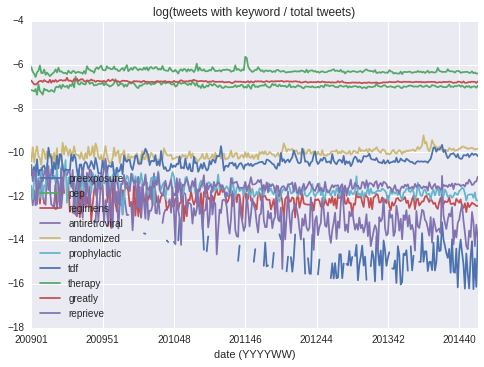

In [3]:
# display and plot
count_word_week = pd.read_csv("sm_w2v/models_freq_tables/red_prophylaxis_wdfreq.csv",
                              index_col=0,
                             )
str_dates = [str(item) for item in count_word_week.index]
count_word_week.index = str_dates
count_word_week.index.name = "date (YYYYWW)"
display(count_word_week)
# add min and take log
count_word_week = count_word_week.apply(lambda x: np.log(x + np.min(x)))
count_word_week.plot(title="log(tweets with keyword / total tweets)")

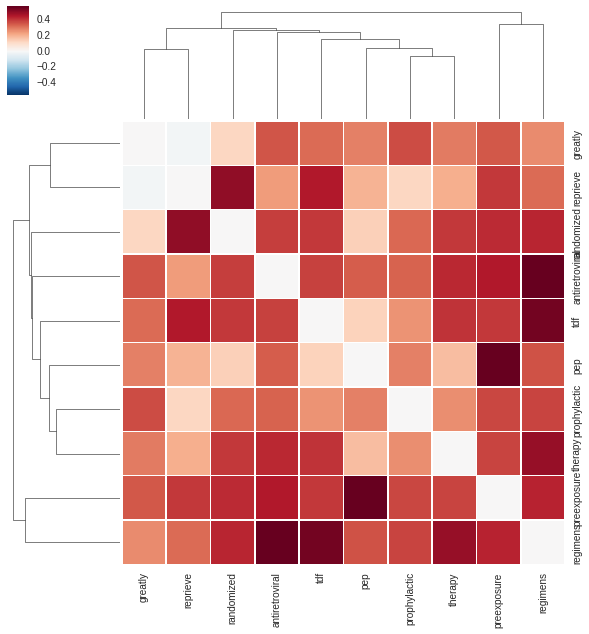

In [4]:
# make heatmap (distance between top 10 word-vectors related to 'prophylaxis'
# over all tweets)
make_heatmap_w2vrelated(model, rel_wds=rel_wds)

# Do PCA

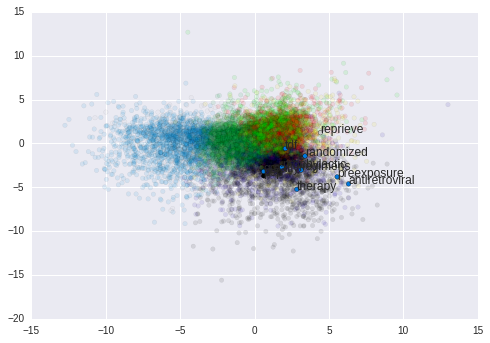

explained variance ratio: 
[ 0.0517748   0.03537987]


In [5]:
# PCA (visualization of all words in 2D)
explained_variances = scikit_pca(model, rel_wds, cluster="kmeans")
print("explained variance ratio: ")
print(explained_variances)